### Windowing Function:

In [1]:
# IMPORTS
import pandas as pd 
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
apple = 'AAPL'
df = yf.download(apple, start='2021-01-01', end='2023-05-21', period='1d')['Close']

[*********************100%***********************]  1 of 1 completed


### Windowing Function:

A **moving window function**, also known as a rolling window function, is a way to compute a function over a **fixed-width sliding window**of data points in a time series. It is a common technique used in time series analysis and is particularly useful for smoothing noisy data, detecting trends and patterns, and calculating rolling statistics.

```
The basic idea of a moving window function is to define a window of a fixed size that moves along the time series and computes a function over the data within that window.
```
Moving window functions refers to functions that can be applied to time-series data by moving fixed / variable size window over total data and computing descriptive statistics over window data each time.

In [3]:
def plot(x):
    plt.figure(figsize=(10, 3))
    plt.plot(x)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.grid(True)
    plt.show()
    
def plot2(x,y):
    plt.figure(figsize=(10, 3))
    plt.plot(x)
    plt.plot(y)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.grid(True)
    plt.show()

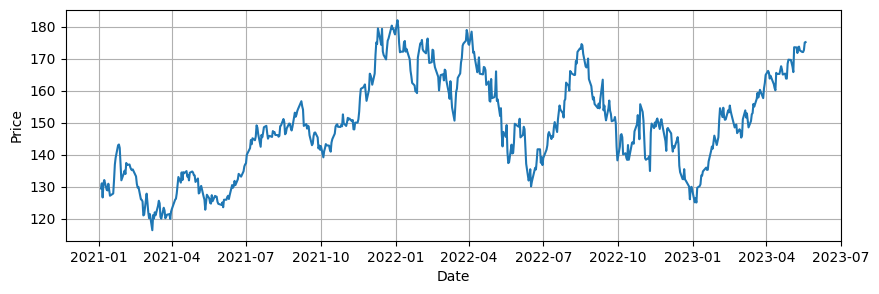

In [4]:
plot(df)

Compute a rolling average with a window of size 3

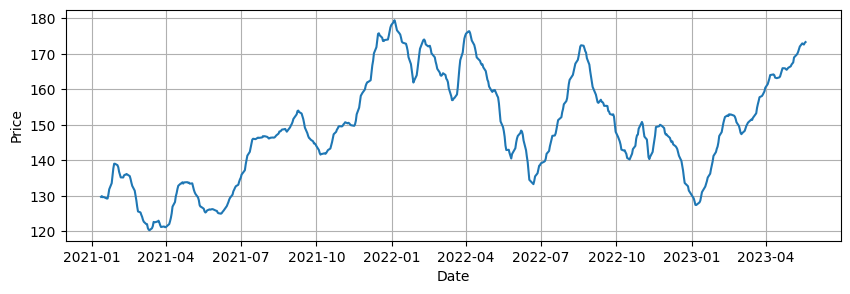

In [5]:
rolling_mean = df.rolling(window=7).mean()

plot(rolling_mean)

Let's research a little bit:

In [6]:
rolling_mean.head()

Date
2021-01-04   NaN
2021-01-05   NaN
2021-01-06   NaN
2021-01-07   NaN
2021-01-08   NaN
Name: Close, dtype: float64

The first two values in the rolling mean are NaN, since there is not enough data to compute a rolling average, but the subsequent values are the rolling averages over the window of size 3.


1. **Window size:** The size of the window used in a moving window function is an important parameter that can affect the results. A larger window size will give a smoother rolling average, but may also mask shorter-term fluctuations in the data. A smaller window size will capture shorter-term fluctuations but may be more susceptible to noise in the data.

2. **Centering:** By default, the `rolling()` function in Pandas uses a trailing window, which means that the window is anchored to the right end of the time series. However, it's also possible to use a centered window, which computes the function over a window centered at each time step. This can be done by passing the argument "center=True" to the `rolling()` function.

3. **Other functions:** In addition to computing rolling averages, other functions can be applied to the data within the moving window, such as computing the minimum, maximum, or standard deviation. The `rolling()` function in Pandas can be used with any function that takes a one-dimensional array as input.

4. **Multiple windows:** It's also possible to compute moving window functions with multiple window sizes, which can capture both short-term and long-term trends in the data. This can be done by chaining multiple `rolling()` functions together, each with a different window size.

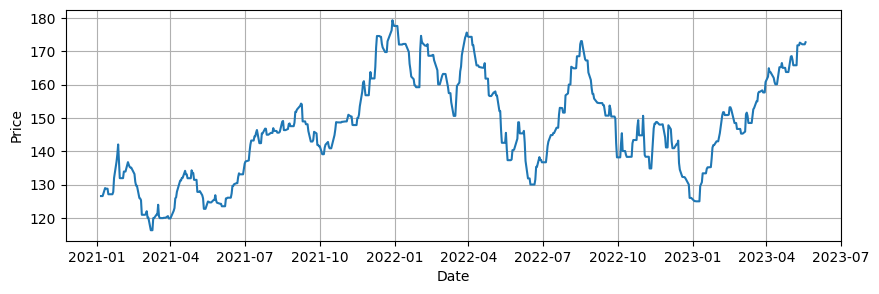

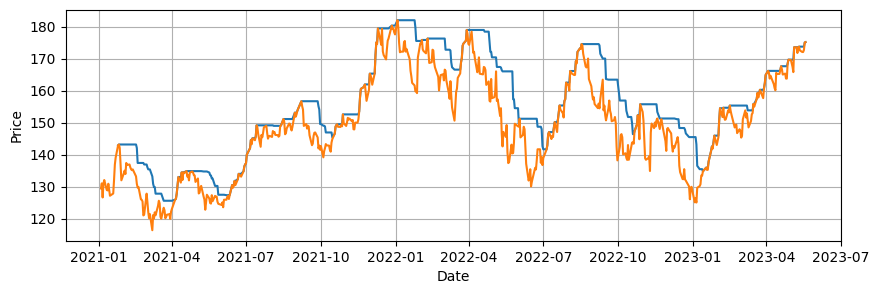

In [7]:
rolling_min = df.rolling(window=3).min()
rolling_max = df.rolling(window=15).max()

plot(rolling_min)
plot2(rolling_max,df)

Moving window functions are widely used in time series analysis for a variety of purposes, such as:

1. **Trend estimation:** A moving window function can be used to estimate the trend in a time series by computing a rolling average or other function over a fixed-size window. This can be useful for identifying long-term patterns in the data and removing short-term noise.

2. **Smoothing:** Moving window functions can be used to smooth out noisy data by computing a rolling average or other function over a window. This can help to identify underlying trends in the data that may be obscured by noise.

3. **Seasonality detection:** A moving window function can be used to identify seasonal patterns in a time series by computing a rolling average over a fixed-size window that corresponds to the length of a seasonal cycle.

4. **Outlier detection:** Moving window functions can be used to detect outliers in a time series by computing a rolling median or other robust statistic that is less sensitive to extreme values than the mean.

5. **Forecasting:** Moving window functions can be used to compute rolling statistics such as the mean or standard deviation, which can be used as inputs to time series forecasting models.

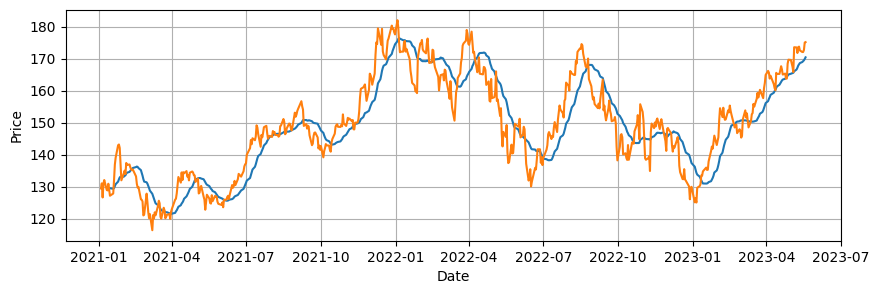

In [8]:
roll = df.rolling(window = 20, min_periods = 10).mean()
plot2(roll,df)


In the Pandas `rolling()` function, the `min_periods` parameter specifies the minimum number of observations in each window required to calculate a rolling statistic.

In the code above, a 20-day rolling mean is calculated. The `min_periods=20` parameter specifies that the rolling mean should only be computed if there are at least 20 non-NaN values in each window.

This parameter is useful for dealing with missing data or gaps in the time series. If there are not enough data points within a window to calculate the rolling statistic, the result will be NaN.

### Expanding window mean:

In time series analysis, the expanding window mean is a statistical calculation that computes the mean of a time series over an expanding window of observations. Unlike a rolling window, which uses a fixed-size window of observations, an expanding window includes all observations up to the current time point.

To calculate the expanding window mean in Python using Pandas, you can use the expanding() function along with the mean() function. Here's an example:

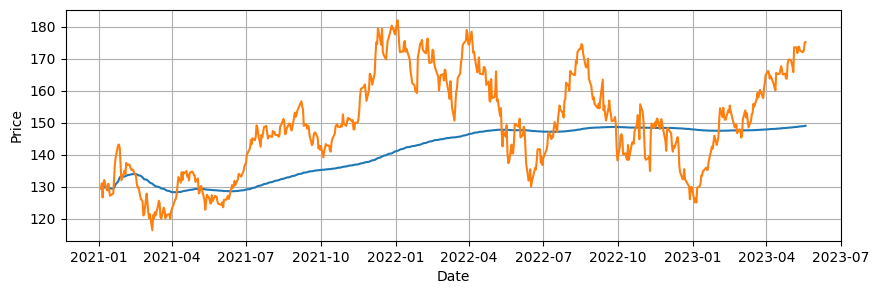

In [10]:
exp_mean = df.expanding().mean()

plot2(exp_mean,df)

We  will also suggest you to go through the following blog and video:

https://www.projectpro.io/recipes/deal-with-rolling-time-window-in-python   

https://youtu.be/IlG2hYm-Bcw?t=113 